In [4]:
import os
import pandas as pd
import numpy as np

input_path = os.path.join('df_final.csv')
df = pd.read_csv(input_path, parse_dates=["File_Date"])
# df.drop(columns=['Unnamed: 0'], inplace=True)

print(df.head(10).to_latex(index=False))

\begin{tabular}{llllrrrrl}
\toprule
File_Date & Company & Date & Time & Shares_Top_of_Book & Prices_Top_of_Book & Price_of_One_Share & Number_of_Shares_Sold & Transaction_type \\
\midrule
2024-07-10 12:21:57 & APPLE INC COM & 2024-07-10 & 11:21:47 & 130.000000 & 230.980000 & 230.900000 & 1.000000 & asks \\
2024-07-10 12:21:57 & APPLE INC COM & 2024-07-10 & 11:21:49 & 431.000000 & 230.990000 & 230.940000 & 1.000000 & asks \\
2024-07-10 12:21:57 & APPLE INC COM & 2024-07-10 & 11:21:40 & 336.000000 & 230.880000 & 230.920000 & 7.000000 & bids \\
2024-07-10 12:21:57 & APPLE INC COM & 2024-07-10 & 11:21:40 & 235.000000 & 230.890000 & 230.920000 & 5.000000 & bids \\
2024-07-10 12:21:57 & APPLE INC COM & 2024-07-10 & 11:21:40 & 222.000000 & 230.900000 & 230.920000 & 3.000000 & bids \\
2024-07-10 12:21:57 & APPLE INC COM & 2024-07-10 & 11:21:47 & 100.000000 & 230.970000 & 230.900000 & 400.000000 & asks \\
2024-07-10 12:21:57 & APPLE INC COM & 2024-07-10 & 11:21:43 & 110.000000 & 230.920000 & 23

In [5]:
df = df[df['Company'] == 'APPLE INC COM']
df = df[["File_Date", "Price_of_One_Share", "Transaction_type", "Number_of_Shares_Sold" ]]
df.head(10) #print

,File_Date,Price_of_One_Share,Transaction_type,Number_of_Shares_Sold
0,2024-07-10 12:21:57,230.90,asks,1.0
1,2024-07-10 12:21:57,230.94,asks,1.0
2,2024-07-10 12:21:57,230.92,bids,7.0
3,2024-07-10 12:21:57,230.92,bids,5.0
4,2024-07-10 12:21:57,230.92,bids,3.0
5,2024-07-10 12:21:57,230.90,asks,400.0
6,2024-07-10 12:21:57,230.91,bids,1.0
7,2024-07-10 12:21:57,230.91,asks,52.0
8,2024-07-10 12:21:57,230.91,asks,48.0
9,2024-07-10 12:21:57,230.92,bids,1.0


In [6]:
df = df.reset_index(drop=True)

df['File_Date'] = pd.to_datetime(df['File_Date'])
df['Diff'] = (df['File_Date'] - df['File_Date'].shift().fillna(df['File_Date'].min())).dt.total_seconds()

filtered_diff = df[(df['Diff'] > 1) & (df['Diff'] < 43200)]
max_diff = filtered_diff['Diff'].max()
print("Diferença máxima (considerando até 12 horas para desconsiderar diferença de dias distintos): ", max_diff)

print("Linha com a maior diferença: ")
f_index = filtered_diff[filtered_diff['Diff'] == max_diff].index[0]
print(df.loc[f_index - 1])

print("Linha anterior: ")
print(df.loc[f_index])

mean_diff = filtered_diff['Diff'].mean()
print("Média de tempo entre transações: ", mean_diff)

df.drop(columns=['Diff'], inplace=True)


Diferença máxima (considerando até 12 horas para desconsiderar diferença de dias distintos):  3285.0
Linha com a maior diferença: 
File_Date                2024-07-11 17:22:40
Price_of_One_Share                    227.78
Transaction_type                        bids
Number_of_Shares_Sold                    3.0
Diff                                     0.0
Name: 7639, dtype: object
Linha anterior: 
File_Date                2024-07-11 18:17:25
Price_of_One_Share                    227.61
Transaction_type                        asks
Number_of_Shares_Sold                    5.0
Diff                                  3285.0
Name: 7640, dtype: object
Média de tempo entre transações:  57.8935677160923


In [7]:
min_date = df['File_Date'].min()
max_date = df['File_Date'].max()
print("Data mínima: ", min_date)
print("Data máxima: ", max_date)

Data mínima:  2024-07-10 12:21:57
Data máxima:  2024-10-18 18:00:02


In [8]:
print("Quantidade de capturas: ", len(df))
print("Capturas vazias: ")
print(df[df.isnull().any(axis=1)])
print("Quantidade de capturas vazias: ", len(df[df.isnull().any(axis=1)]))
df = df.dropna()
df['File_Date'] = pd.to_datetime(df['File_Date'])

Quantidade de capturas:  302710
Capturas vazias: 
                 File_Date  Price_of_One_Share Transaction_type  \
12960  2024-07-12 18:08:36                 NaN             bids   
12961  2024-07-12 18:08:36                 NaN             bids   
12962  2024-07-12 18:08:36                 NaN             bids   
12963  2024-07-12 18:08:36                 NaN             bids   
12964  2024-07-12 18:08:36                 NaN             bids   
...                    ...                 ...              ...   
296255 2024-10-17 14:51:04                 NaN             bids   
296256 2024-10-17 14:51:04                 NaN             bids   
296257 2024-10-17 14:51:04                 NaN             bids   
296258 2024-10-17 14:51:04                 NaN             bids   
296259 2024-10-17 14:51:04                 NaN             bids   

        Number_of_Shares_Sold  
12960                     NaN  
12961                     NaN  
12962                     NaN  
12963            

In [9]:
df2 = df.copy()
threshold = 1 #segundos

df2['File_Date'] = pd.to_datetime(df2['File_Date'])
# Cria-se uma coluna "group" que identifica ofertas capturadas dentro de um intervalo de 5 segundos
# cumsum() garante que cada grupo tenha um valor único
df2['group'] = df2['File_Date'].diff().dt.total_seconds().gt(threshold).cumsum()
# Todas as ofertas dentro de um mesmo grupo recebem a data da primeira oferta
df2['File_Date'] = df2.groupby('group').transform('first')['File_Date']
df2 = df2.drop('group', axis=1)

# Comparação entre os dataframes
print("Comparação entre antes e depois da unificação de horários: ")
print(df.compare(df2))

print("Quantidade de capturas afetadas: ", (df.compare(df2).shape[0]))
# Apenas as File_Date únicas da comparação
print("File_Date afetadas: ", (df['File_Date'].unique().shape[0] - df2['File_Date'].unique().shape[0]))


Comparação entre antes e depois da unificação de horários: 
                 File_Date                    
                      self               other
3126   2024-07-10 17:19:48 2024-07-10 17:19:47
3127   2024-07-10 17:19:48 2024-07-10 17:19:47
3128   2024-07-10 17:19:48 2024-07-10 17:19:47
3129   2024-07-10 17:19:48 2024-07-10 17:19:47
3271   2024-07-10 17:34:05 2024-07-10 17:34:04
...                    ...                 ...
300489 2024-10-18 14:28:05 2024-10-18 14:28:04
300876 2024-10-18 15:04:53 2024-10-18 15:04:52
300877 2024-10-18 15:04:53 2024-10-18 15:04:52
300878 2024-10-18 15:04:53 2024-10-18 15:04:52
300879 2024-10-18 15:04:53 2024-10-18 15:04:52

[690 rows x 2 columns]
Quantidade de capturas afetadas:  690
File_Date afetadas:  132


In [10]:
groups = [1, 14, 999]
for group_days in groups:
  df2 = df.copy()
  df2['File_Date'] = df2['File_Date'].dt.floor('D')
  df2 = df2.groupby(pd.Grouper(key='File_Date', freq=f'{group_days}D')).agg(
    Day=('File_Date', 'first'),
    Count=('File_Date', 'size')
  )
  df2 = df2.dropna().set_index('Day')

  print(f"Contagem de observações por período de {group_days} dias: ")
  print(df2.to_latex())

Contagem de observações por período de 1 dias: 
\begin{tabular}{lr}
\toprule
 & Count \\
Day &  \\
\midrule
2024-07-10 00:00:00 & 3550 \\
2024-07-11 00:00:00 & 4300 \\
2024-07-12 00:00:00 & 5110 \\
2024-07-15 00:00:00 & 4720 \\
2024-07-16 00:00:00 & 5020 \\
2024-07-17 00:00:00 & 4930 \\
2024-07-18 00:00:00 & 5150 \\
2024-07-19 00:00:00 & 5010 \\
2024-07-22 00:00:00 & 4650 \\
2024-07-24 00:00:00 & 5090 \\
2024-07-25 00:00:00 & 4950 \\
2024-07-26 00:00:00 & 5030 \\
2024-07-29 00:00:00 & 2720 \\
2024-07-30 00:00:00 & 4940 \\
2024-07-31 00:00:00 & 4990 \\
2024-08-01 00:00:00 & 4880 \\
2024-08-02 00:00:00 & 4940 \\
2024-08-05 00:00:00 & 5060 \\
2024-08-06 00:00:00 & 4960 \\
2024-08-08 00:00:00 & 4720 \\
2024-08-09 00:00:00 & 4590 \\
2024-08-12 00:00:00 & 5070 \\
2024-08-15 00:00:00 & 4880 \\
2024-08-16 00:00:00 & 5020 \\
2024-08-19 00:00:00 & 3600 \\
2024-08-20 00:00:00 & 5160 \\
2024-08-21 00:00:00 & 4870 \\
2024-08-23 00:00:00 & 4980 \\
2024-08-26 00:00:00 & 3980 \\
2024-08-27 00:00:00 & 

In [11]:
group_days = 14
attrs = ['Price_of_One_Share', 'Number_of_Shares_Sold']
for attr in attrs:
  df2 = df.copy()
  df2 = df2[['File_Date', attr]]
  df2 = df2.groupby(pd.Grouper(key='File_Date', freq=f'{group_days}D')).describe()

  df2 = df2.round(3)
  print(f"Descrição de {attr} por período: ")
  print(df2.to_latex())

Descrição de Price_of_One_Share por período: 
\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{8}{r}{Price_of_One_Share} \\
 & count & mean & std & min & 25% & 50% & 75% & max \\
File_Date &  &  &  &  &  &  &  &  \\
\midrule
2024-07-10 00:00:00 & 42440.000000 & 229.242000 & 3.865000 & 222.520000 & 225.174000 & 228.880000 & 232.402000 & 236.530000 \\
2024-07-24 00:00:00 & 47560.000000 & 217.259000 & 5.258000 & 197.130000 & 216.930000 & 218.340000 & 220.300000 & 225.460000 \\
2024-08-07 00:00:00 & 33040.000000 & 220.979000 & 5.298000 & 209.100000 & 216.120000 & 224.220000 & 225.860000 & 227.160000 \\
2024-08-21 00:00:00 & 33580.000000 & 226.624000 & 1.776000 & 221.400000 & 225.840000 & 226.610000 & 228.080000 & 230.970000 \\
2024-09-04 00:00:00 & 37930.000000 & 220.394000 & 2.278000 & 214.135000 & 219.250000 & 220.720000 & 222.160000 & 225.170000 \\
2024-09-18 00:00:00 & 49490.000000 & 227.195000 & 3.020000 & 217.100000 & 225.910000 & 227.400000 & 228.840000 & 233.190000 \\
2024-10-02

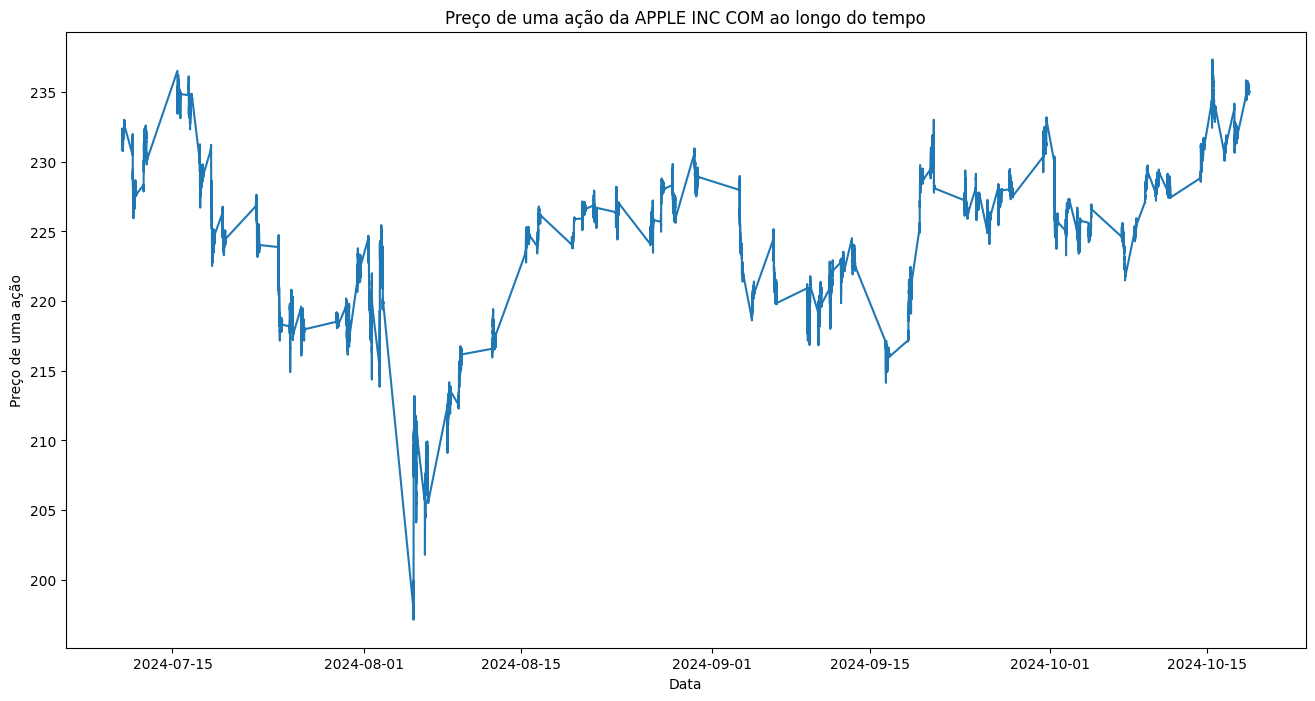

In [12]:
import matplotlib.pyplot as plt

df2 = df.copy()
df2 = df2.set_index('File_Date')

plt.figure(figsize=(16, 8))
plt.plot(df2['Price_of_One_Share'])
plt.title('Preço de uma ação da APPLE INC COM ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Preço de uma ação')
plt.show()
